# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Understanding the data

### Importing the dataset

In [2]:
# Uploading the store information data

store_dataset = pd.read_csv("C:\\Sri Eshwar College of Engineering\\SEMESTER - 4\\DATA SCIENCE\\DS Project\\rossmann-store-sales\\store.csv")
store_dataset.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
# Importing the sales training data

sales_dataset = pd.read_csv("C:\\Sri Eshwar College of Engineering\\SEMESTER - 4\\DATA SCIENCE\\DS Project\\rossmann-store-sales\\train.csv")
sales_dataset.head()

C:\Users\sudha\AppData\Local\Temp\ipykernel_10532\4062633504.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_dataset = pd.read_csv("C:\\Sri Eshwar College of Engineering\\SEMESTER - 4\\DATA SCIENCE\\DS Project\\rossmann-store-sales\\train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# Preparing and Exploring the Data

## Sales Train dataset

In [5]:
sales_dataset.describe()

# Customers: Average of 633 customers
# Sales: Average of 5773 Euros per day
# Stores: 1017209 stores data in this dataset

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
store_dataset.describe()

# Competitors distance on average: 5404 meters
# All columns will be used as features


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


<Axes: >

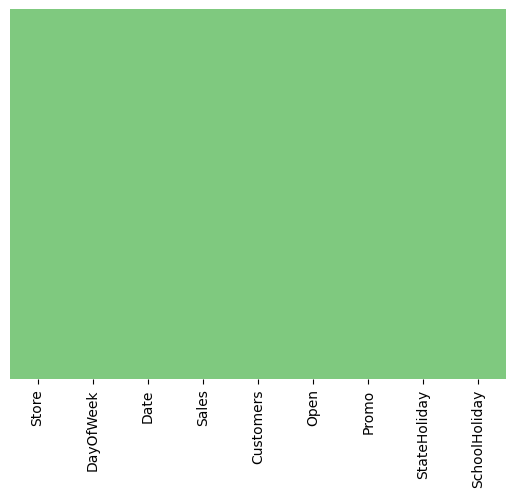

In [7]:
# Checking for missing data

# There is no missing data on this dataframe

df_null = sales_dataset.isnull()
sns.heatmap(df_null, yticklabels=False, cbar=False, cmap = 'Accent')

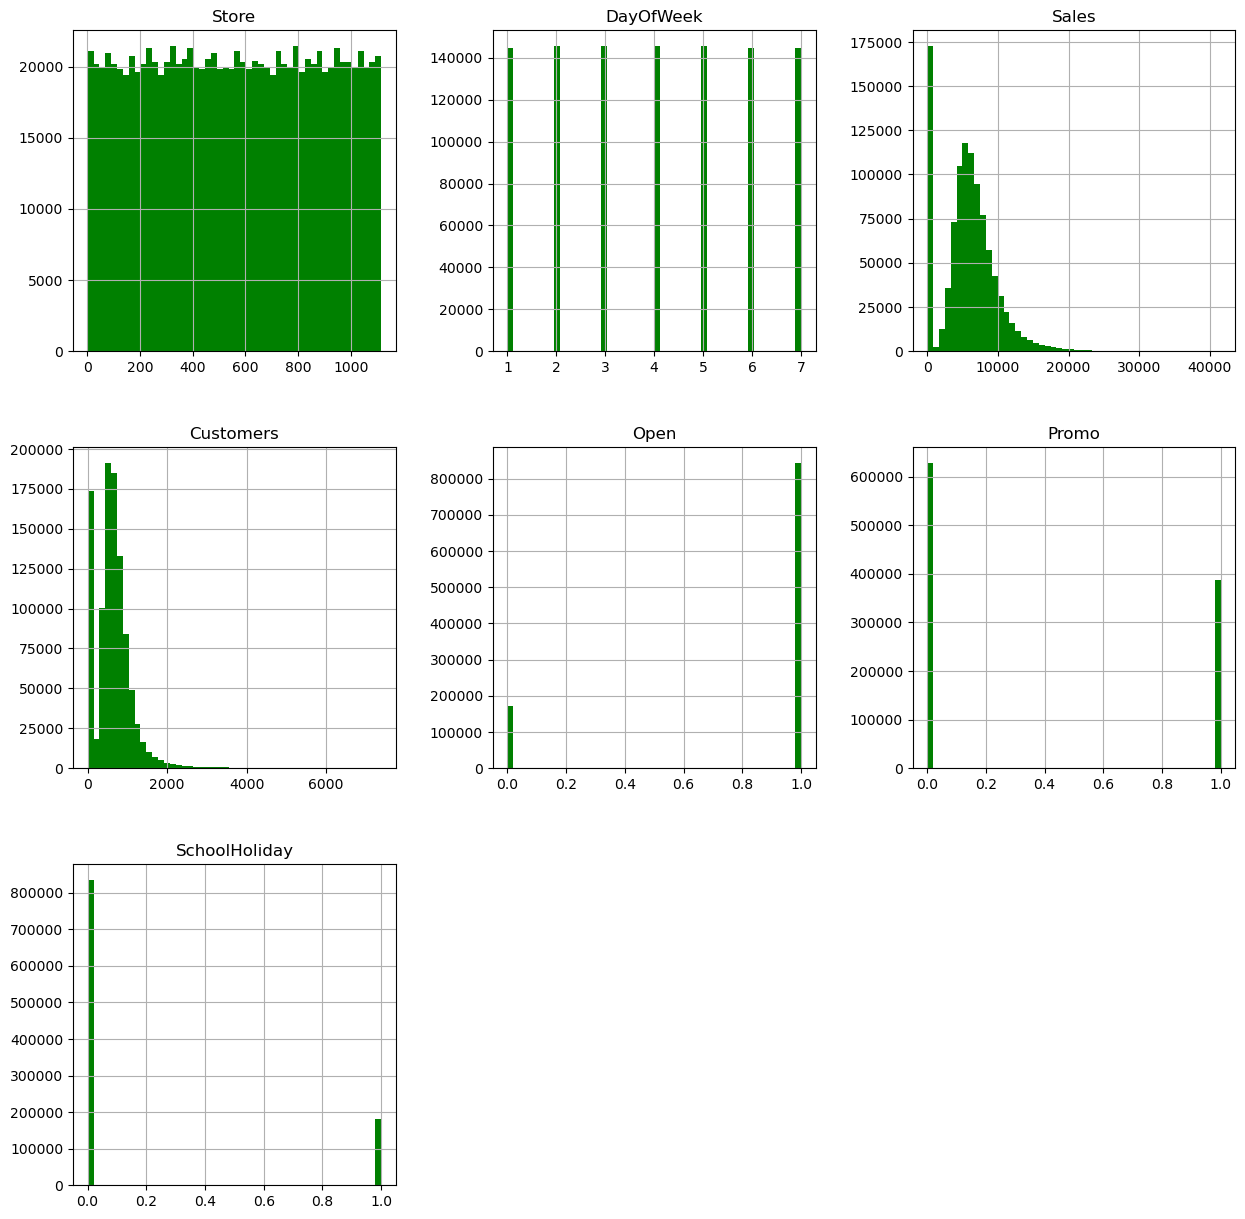

In [8]:
# Plotting histograms for the Sales dataset

ax = sales_dataset.hist(bins = 50, figsize = (15,15), color = 'green')

# The data is distributed equaly across the week
# Sales decreases in school holidays
# Data is equaly distributed across the stores


In [9]:
# Stores are open 80% of the time

open = sales_dataset[sales_dataset['Open']==1]
closed = sales_dataset[sales_dataset['Open']==0]

print('Total = ',len(sales_dataset))
print('Number of stores that are open: ', len(open))
print('Percentage store that are open: ', 1.*len(open)/len(sales_dataset)*100, '%')

print('Number of stores that are closed: ', len(closed))
print('Percentage store that are closed: ', 1.*len(closed)/len(sales_dataset)*100, '%')

Total =  1017209
Number of stores that are open:  844392
Percentage store that are open:  83.01066939045958 %
Number of stores that are closed:  172817
Percentage store that are closed:  16.989330609540417 %


In [10]:
# Filtering the dataset to only the lines of Open stores

sales_dataset = sales_dataset[sales_dataset['Open']==1]
sales_dataset.drop(['Open'], axis = 1, inplace = True)
sales_dataset.shape

(844392, 8)

In [11]:
# Actual average os sales is = 6955 Euros and Number of Customers = 762
sales_dataset.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


## Stores dataset

<Axes: >

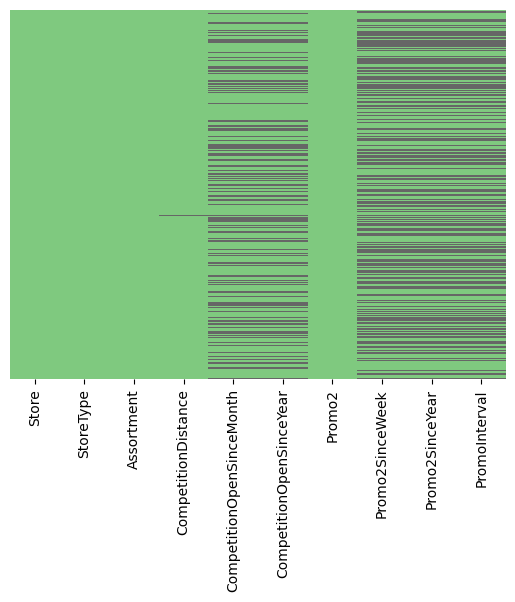

In [12]:
# Checking for missing data

# There a lot of  missing data on this dataframe

df_null = store_dataset.isnull()
sns.heatmap(df_null, yticklabels=False, cbar=False, cmap = 'Accent')

In [13]:
# Treating the missing values

display(store_dataset[store_dataset['CompetitionDistance'].isnull()])
display(store_dataset[store_dataset['CompetitionOpenSinceMonth'].isnull()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [14]:
display(store_dataset[store_dataset['Promo2'].isnull()])
display(store_dataset[store_dataset['Promo2SinceWeek'].isnull()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [15]:
# Deleting columns that are not relevant (toomuch null values):
del_col = ['Promo2SinceWeek',  'Promo2SinceYear', 
           'PromoInterval', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear']

for n in del_col:
  store_dataset[n].fillna(0, inplace = True)





<Axes: >

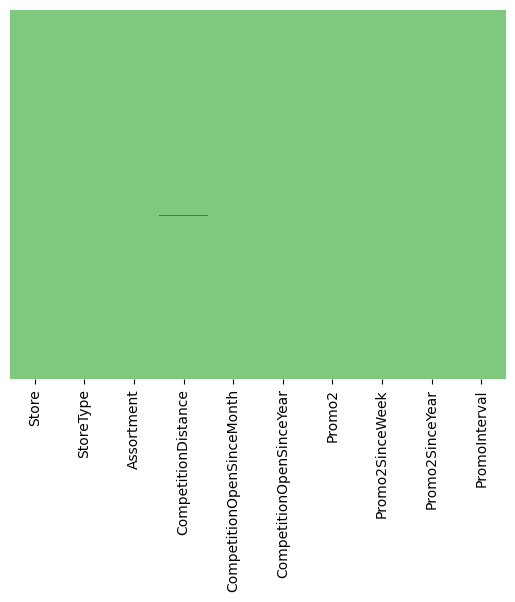

In [16]:
# Checking how is now
df_null = store_dataset.isnull()
sns.heatmap(df_null, yticklabels=False, cbar=False, cmap = 'Accent')

In [17]:
# Treating the misisng data of CompetitionDistance

store_dataset['CompetitionDistance'].fillna(store_dataset['CompetitionDistance'].mean(), inplace = True)

<Axes: >

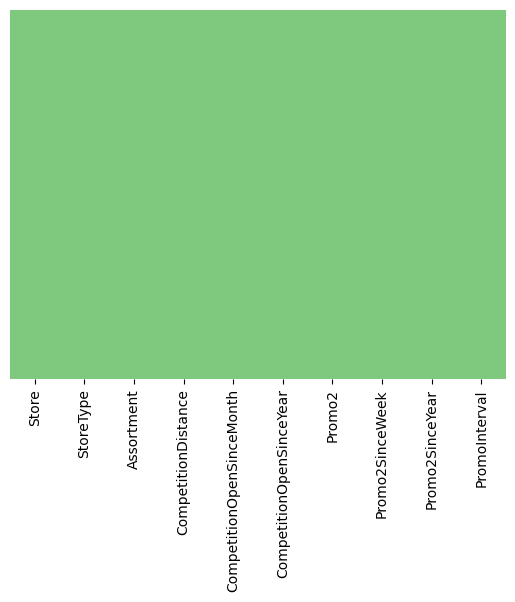

In [18]:
sns.heatmap(store_dataset.isnull(), yticklabels=False, cbar=False, cmap = 'Accent')

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

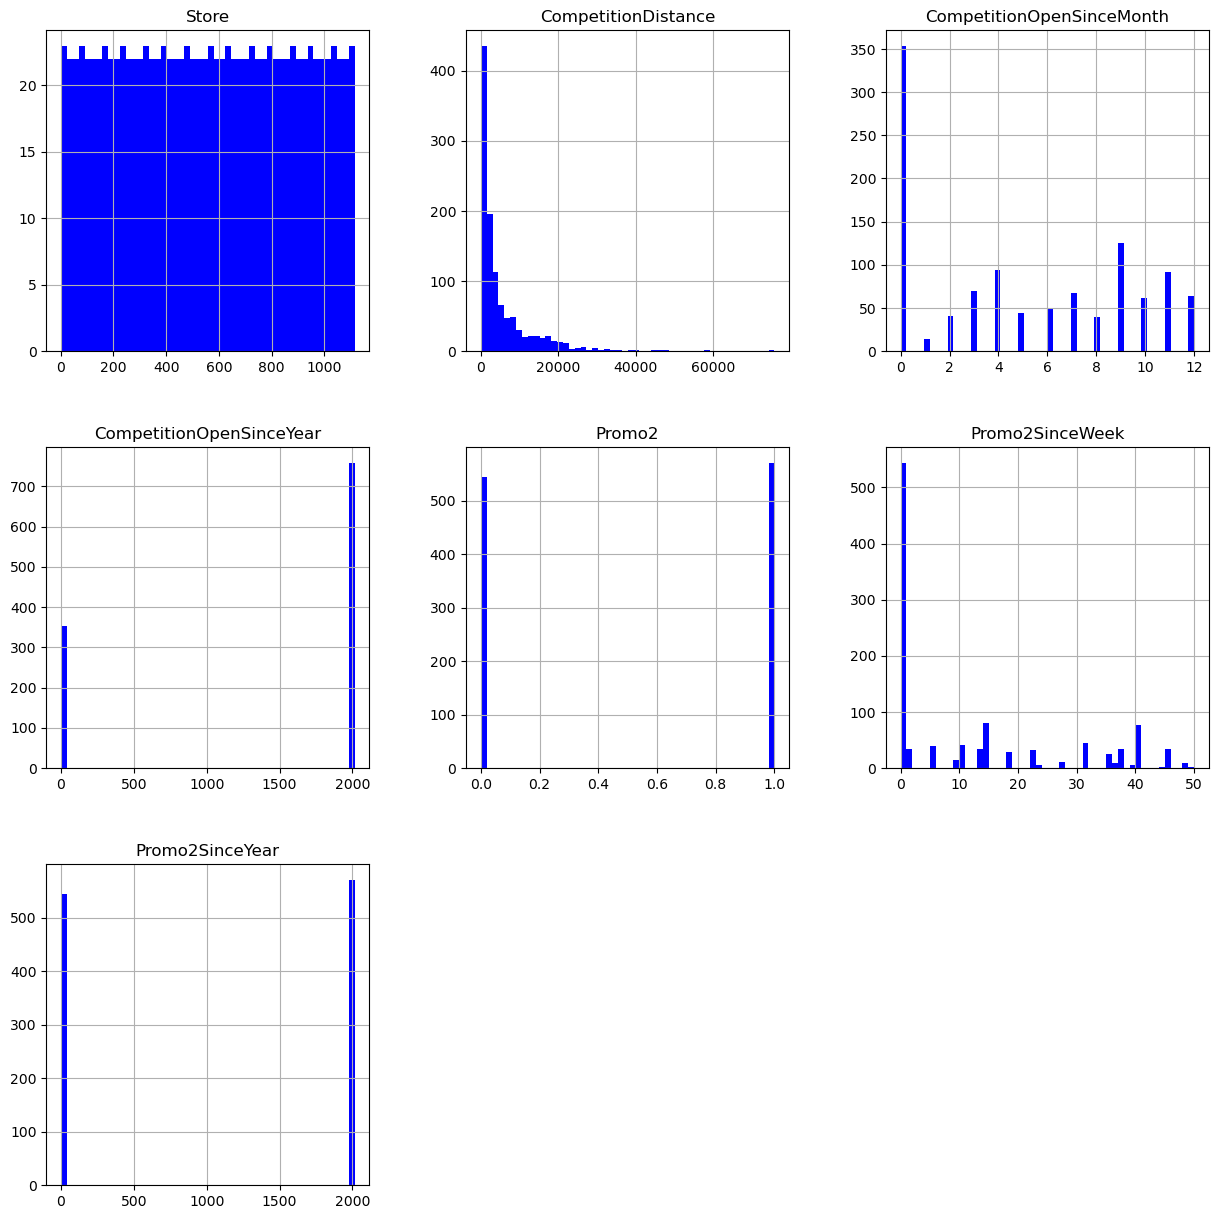

In [19]:
# Plotting Histograms

store_dataset.hist(bins = 50, figsize = (15,15), color = 'blue')

## Merging the two datasets

Store column is the best to use to merge the two dataframes

In [20]:
sales_dataset.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1


In [21]:
store_dataset.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [22]:
# Merging

all_dataset = pd.merge(sales_dataset, store_dataset, how = 'inner', on = 'Store')
all_dataset.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


## Checking the correlations between the features

In [23]:
correlations = all_dataset.corr()['Sales'].sort_values()
correlations

C:\Users\sudha\AppData\Local\Temp\ipykernel_10532\2798607083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = all_dataset.corr()['Sales'].sort_values()


DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

C:\Users\sudha\AppData\Local\Temp\ipykernel_10532\2861603490.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = all_dataset.corr()


<Axes: >

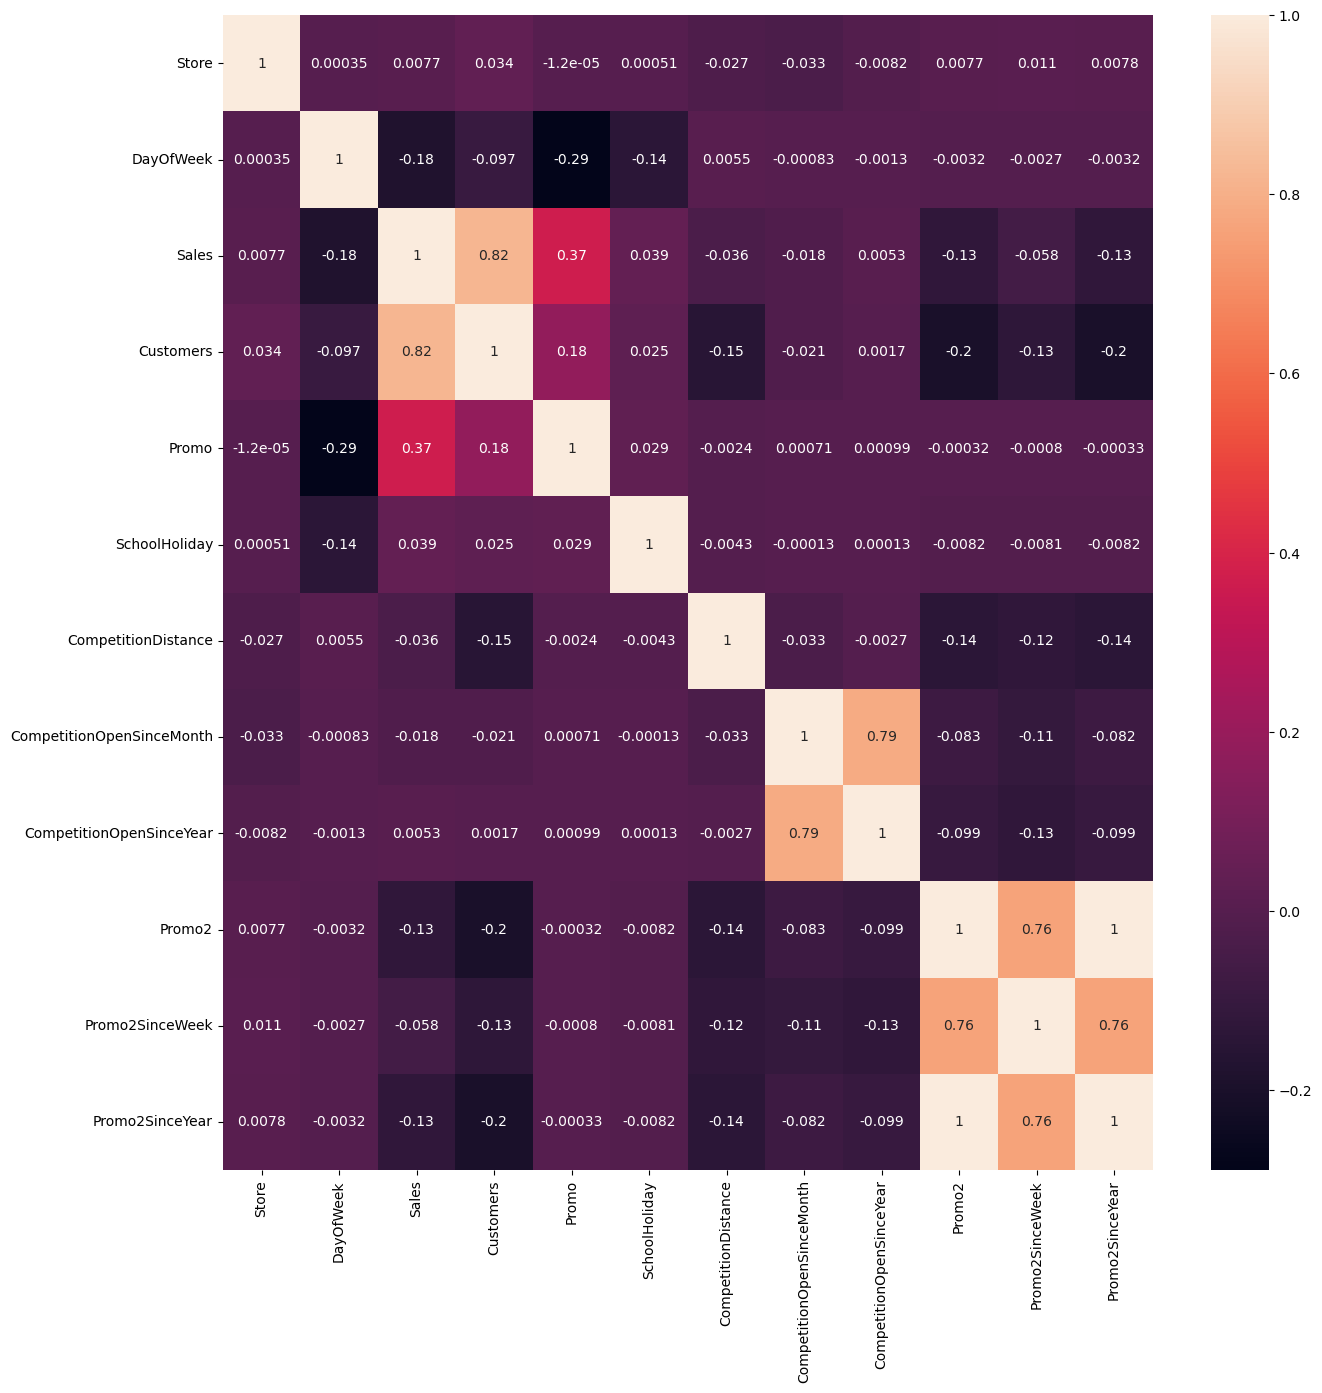

In [24]:
#Visualizing with a heatmap

correlations = all_dataset.corr()
g, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot = True)

# Data Visualization

In [25]:
# Treating the date

all_dataset['Year'] = pd.DatetimeIndex(all_dataset['Date']).year
all_dataset['Month'] = pd.DatetimeIndex(all_dataset['Date']).month
all_dataset['Day'] = pd.DatetimeIndex(all_dataset['Date']).day
all_dataset.head(3)


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29


Text(0.5, 1.0, 'Average Customers per Month')

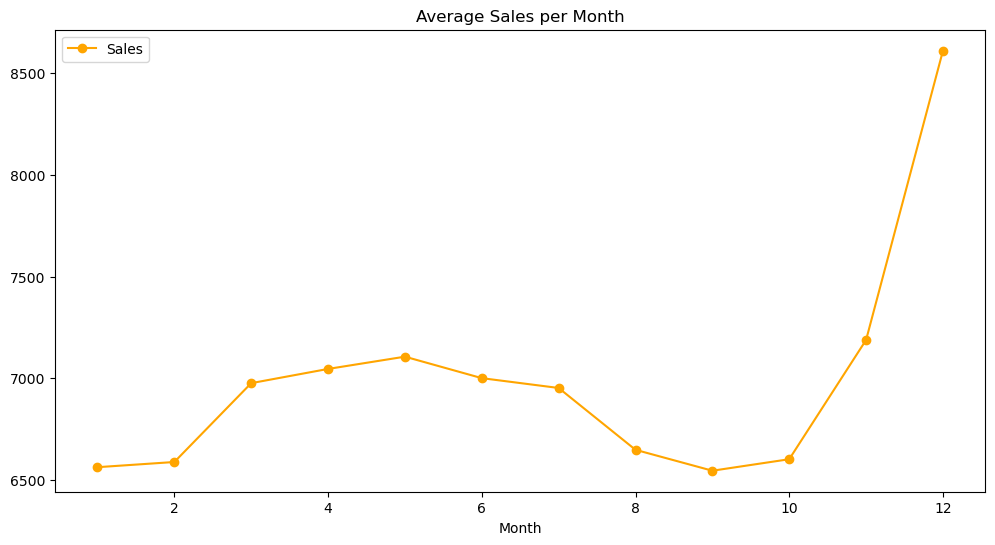

<Figure size 640x480 with 0 Axes>

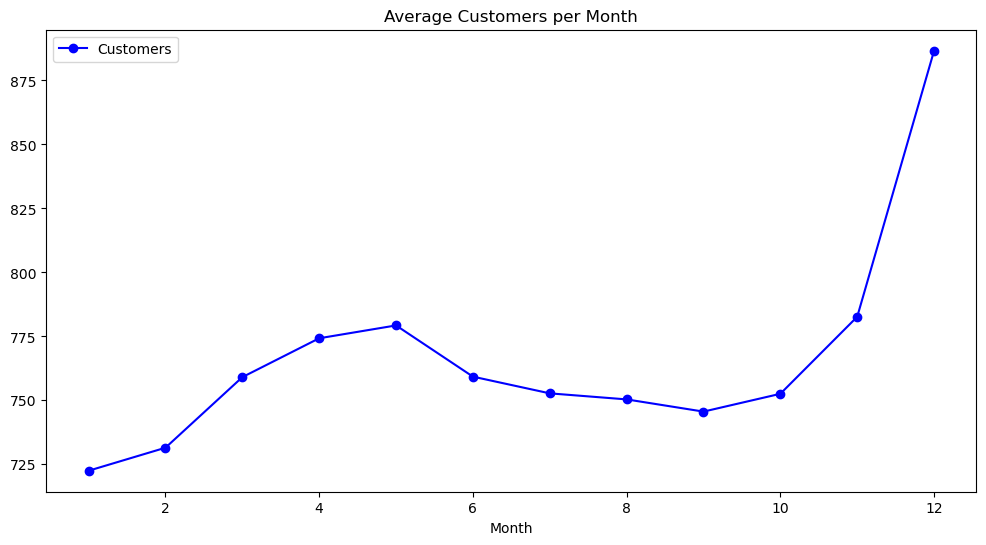

In [26]:
# Average sales and number of customer per Month

ax = all_dataset.groupby('Month')[['Sales']].mean().plot(figsize = (12,6), marker = 'o', color = 'orange')
ax.set_title('Average Sales per Month')

plt.figure()

ax = all_dataset.groupby('Month')[['Customers']].mean().plot(figsize = (12,6), marker = 'o', color = 'blue')
ax.set_title('Average Customers per Month')

# Sales and customers has pick around november and december

Text(0.5, 1.0, 'Average Customers per Day')

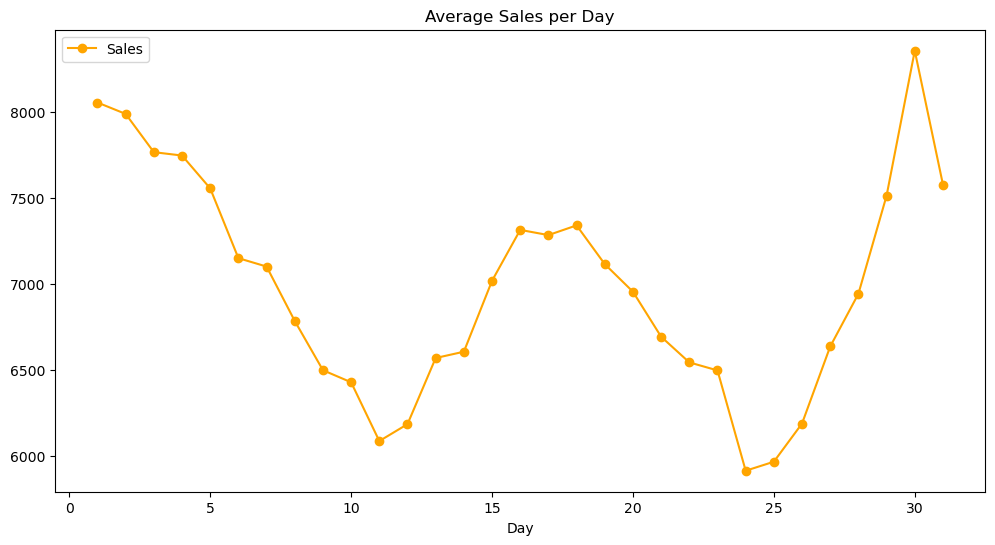

<Figure size 640x480 with 0 Axes>

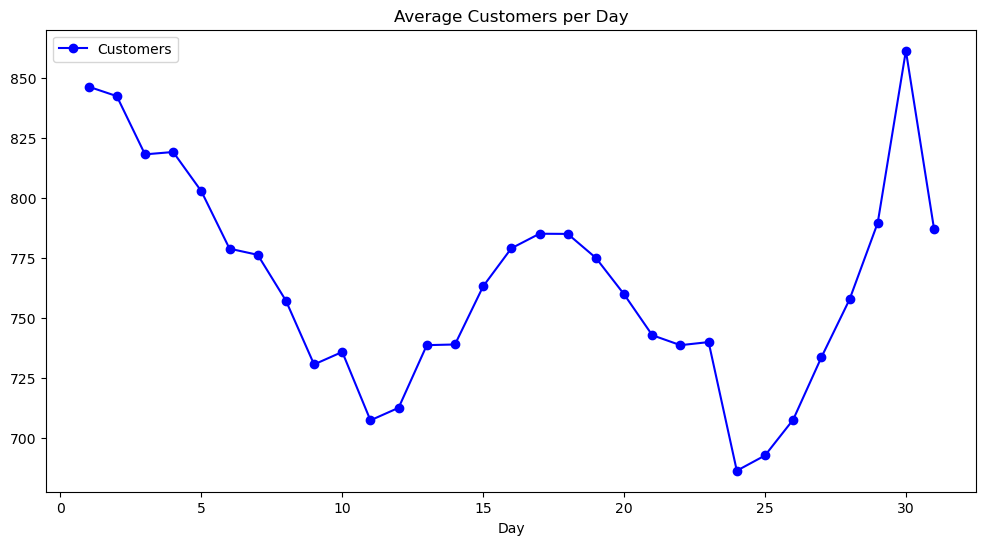

In [27]:
# Checking the average sales and customers per day

ax = all_dataset.groupby('Day')[['Sales']].mean().plot(figsize = (12,6), marker = 'o', color = 'orange')
ax.set_title('Average Sales per Day')

plt.figure()

ax = all_dataset.groupby('Day')[['Customers']].mean().plot(figsize = (12,6), marker = 'o', color = 'blue')
ax.set_title('Average Customers per Day')



Text(0.5, 1.0, 'Average Customers per Day of the Week')

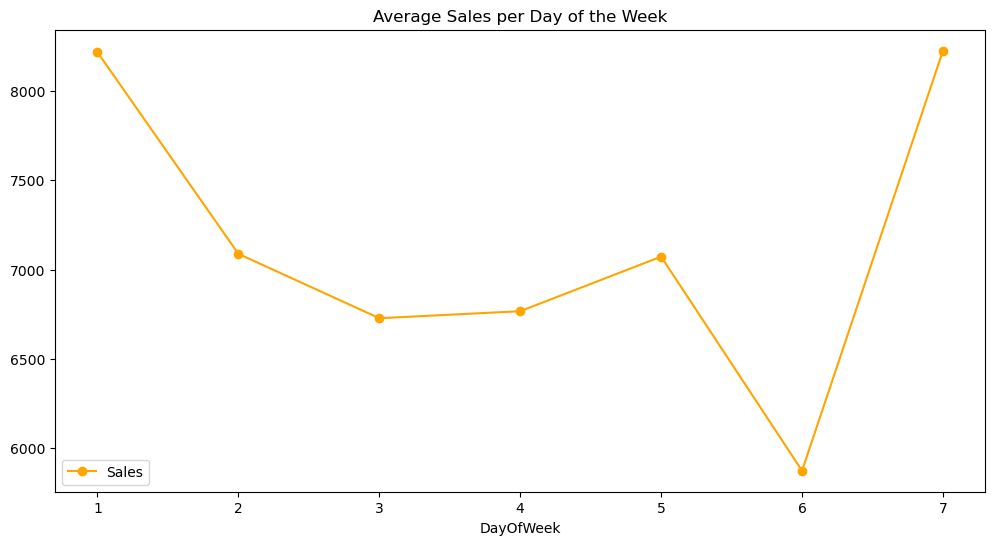

<Figure size 640x480 with 0 Axes>

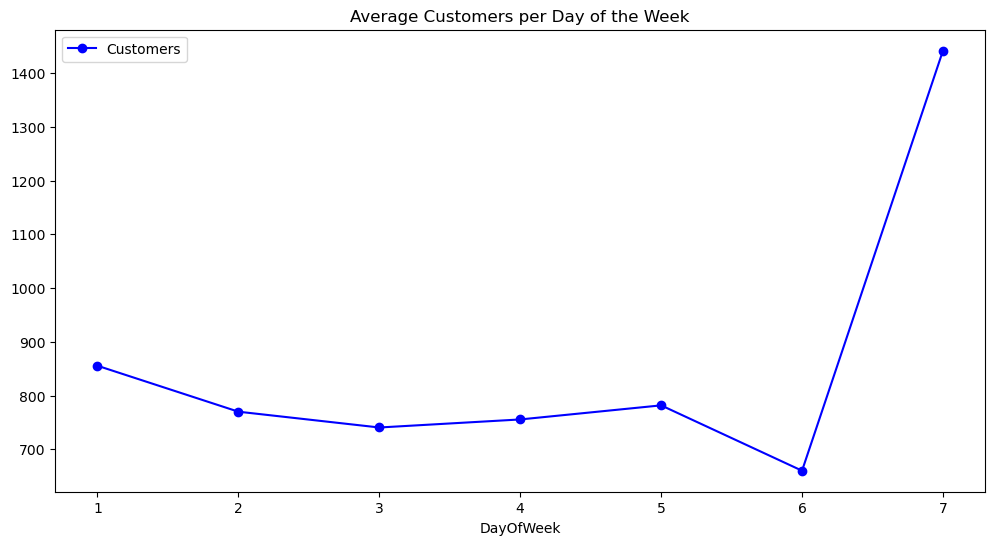

In [28]:
# Checking the average sales and customers per day of the week

ax = all_dataset.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (12,6), marker = 'o', color = 'orange')
ax.set_title('Average Sales per Day of the Week')

plt.figure()

ax = all_dataset.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (12,6), marker = 'o', color = 'blue')
ax.set_title('Average Customers per Day of the Week')

# Pick of sales and customers on sunday

### Conclusion is that there is an influence of seasonality

C:\Users\sudha\AppData\Local\Temp\ipykernel_10532\3660058440.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_dataset.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)


<Axes: xlabel='Date'>

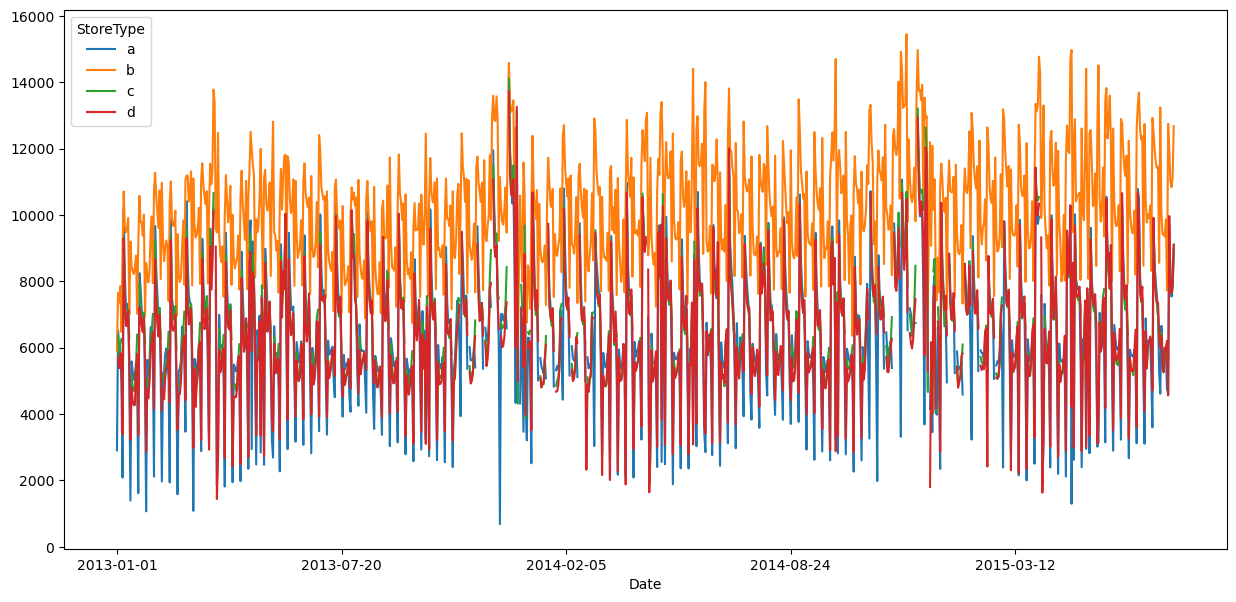

In [29]:
fig, ax = plt.subplots(figsize = (15,7))

all_dataset.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

# Store b has high amount of sales

<Axes: xlabel='Promo', ylabel='Customers'>

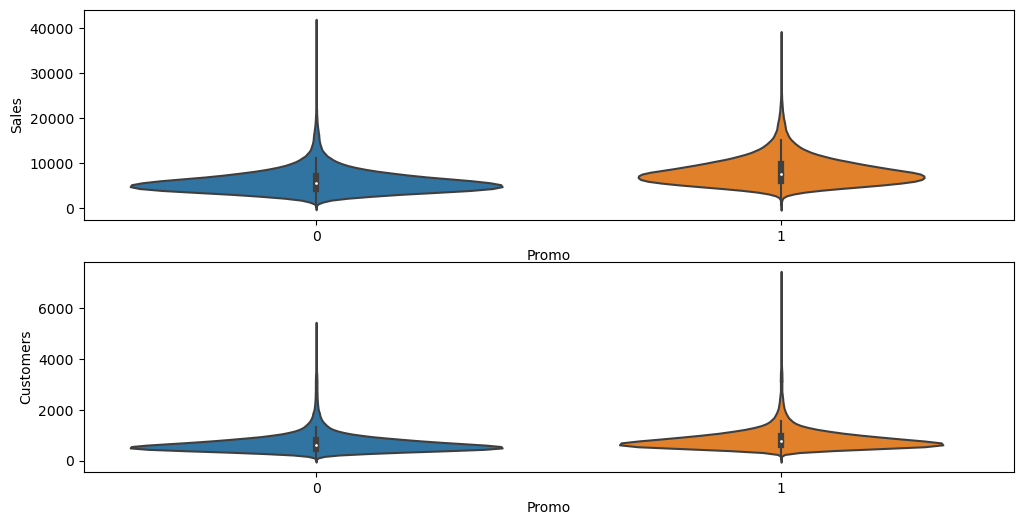

In [30]:
# checking if the promos has any effect on sales

plt.figure(figsize = (12, 6))
plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = all_dataset)
plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = all_dataset)

# Sales and customers are higher with promo

# Using Facebook Prophet

**Facebook Prophet** is highly used for a time series and the data has strong seasonal effects and several seasons of historical data.

## Making predictions (time series only)

In [30]:
! pip install prophet

In [31]:
# Import fbprophet

from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [32]:
# Predictions

# Creating a df with sales data from one specific store and period:

selected_store = 250
periods = 360  #future days

sales_store = all_dataset[all_dataset['Store'] == selected_store]

# For the fbprophet, df must have columns "ds" and "y" with the dates and values respectively.

sales_store = sales_store[['Date', 'Sales']].rename(columns = {'Date' : 'ds', 'Sales' : 'y'})
sales_store = sales_store.sort_values('ds')

# Training the model and predicting for this specific store

model = Prophet()
model.fit(sales_store)
future_df = model.make_future_dataframe(periods = periods)
predictions = model.predict(future_df)

18:33:46 - cmdstanpy - INFO - Chain [1] start processing
18:33:47 - cmdstanpy - INFO - Chain [1] done processing


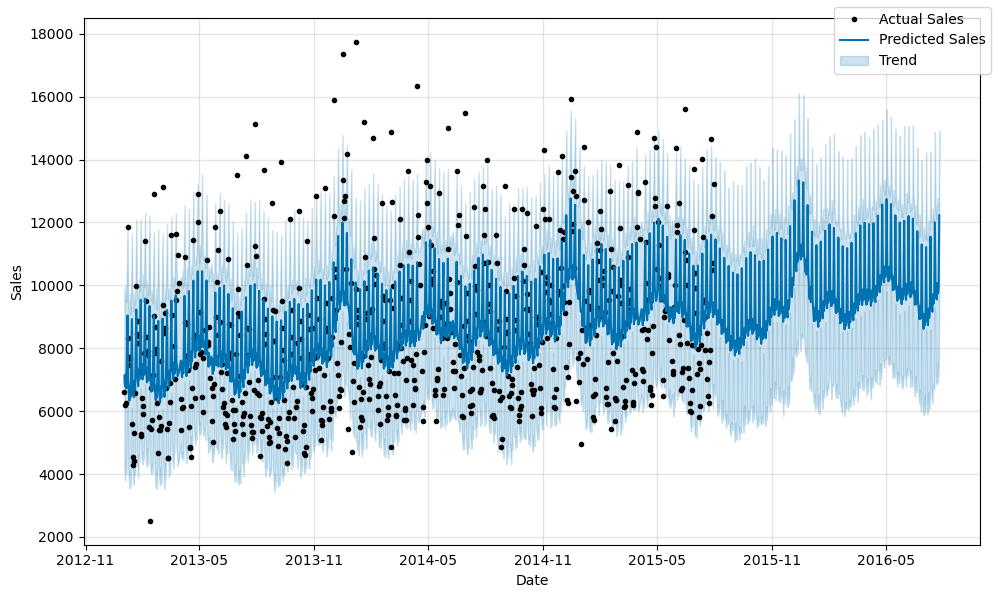

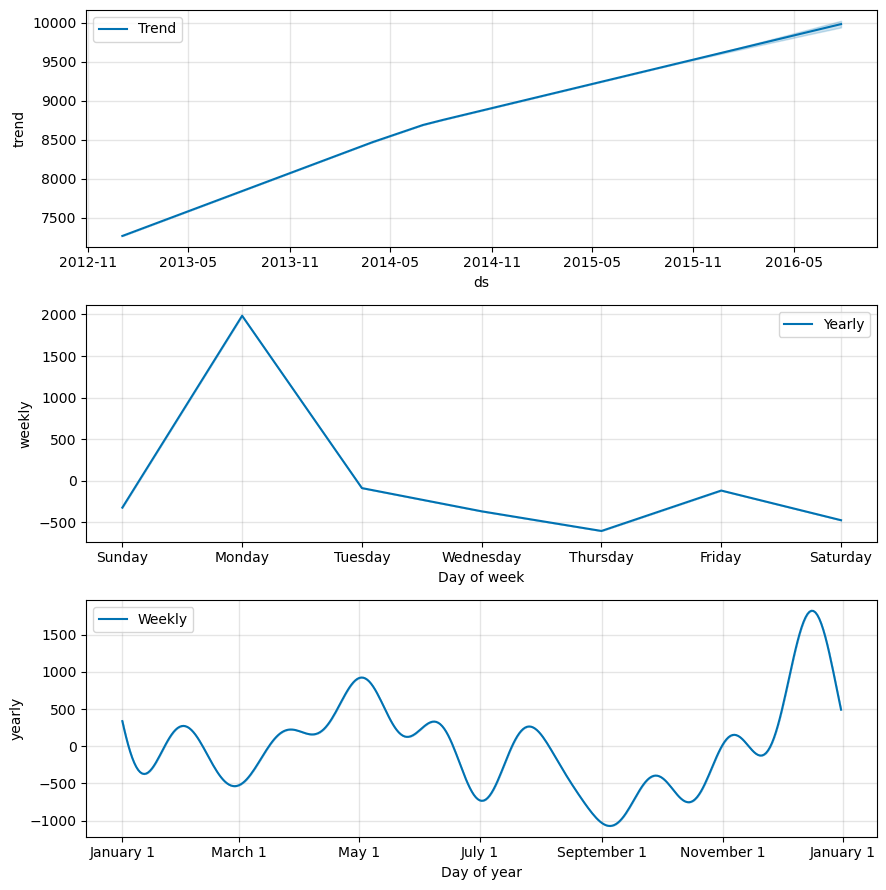

In [33]:
ax = model.plot(predictions, xlabel='Date', ylabel='Sales')
ax2 = model.plot_components(predictions)

# Add legend
ax.legend(['Actual Sales', 'Predicted Sales', 'Trend'])
ax2.get_axes()[0].legend(['Trend'])
ax2.get_axes()[1].legend(['Yearly'])
ax2.get_axes()[2].legend(['Weekly'])


## Making predictions considering the holidays

---



In [34]:
# There are two types of holidays, school holidays and state holidays

school_holidays = all_dataset[all_dataset['SchoolHoliday'] == 1].loc[:, 'Date'].values

state_holidays = all_dataset[(all_dataset['StateHoliday'] == 'a')|(all_dataset['StateHoliday'] == 'b')|(all_dataset['StateHoliday'] == 'c')].loc[:, 'Date'].values

school_holidays = pd.DataFrame({'ds' : pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})

state_holidays = pd.DataFrame({'ds' : pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})

display(school_holidays.shape)
display(state_holidays.shape)

(163457, 2)

(910, 2)

In [35]:
# Concatenate both holidays

holidays_all = pd.concat((state_holidays,school_holidays))
holidays_all.head(3)

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday


In [36]:
# Predictions

# Creating a df with sales data from one specific store and period, considering the holidays:

selected_store = 250
periods = 120  #future days
holidays = holidays_all

sales_store = all_dataset[all_dataset['Store'] == selected_store]

# For the fbprophet, df must have columns "ds" and "y" with the dates and values respectively.

sales_store = sales_store[['Date', 'Sales']].rename(columns = {'Date' : 'ds', 'Sales' : 'y'})
sales_store = sales_store.sort_values('ds')

# Training the model and predicting for this specific store

model = Prophet(holidays=holidays_all)
model.fit(sales_store)
future_df = model.make_future_dataframe(periods = periods)
predictions = model.predict(future_df)

18:34:26 - cmdstanpy - INFO - Chain [1] start processing
18:34:26 - cmdstanpy - INFO - Chain [1] done processing


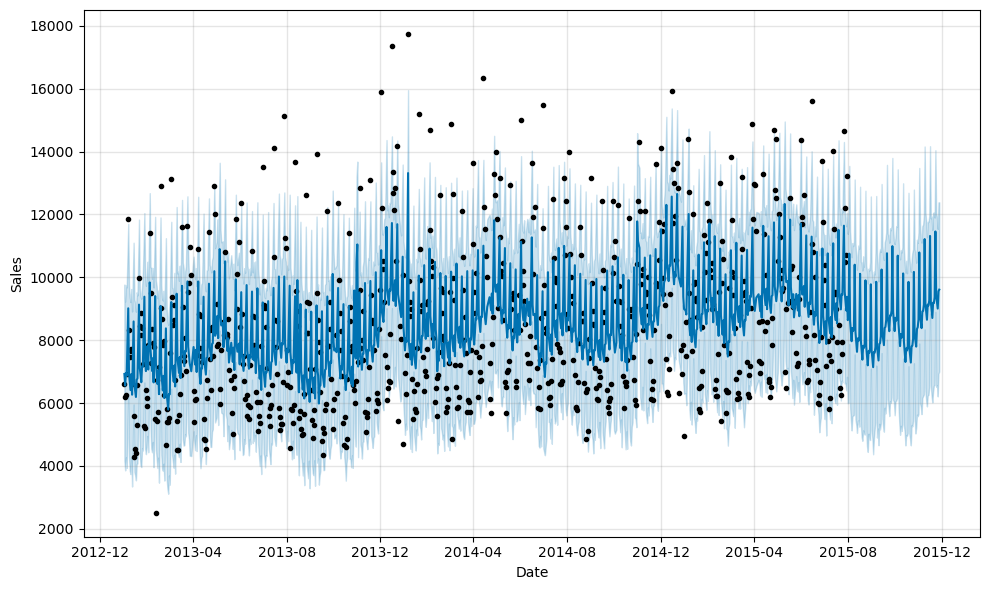

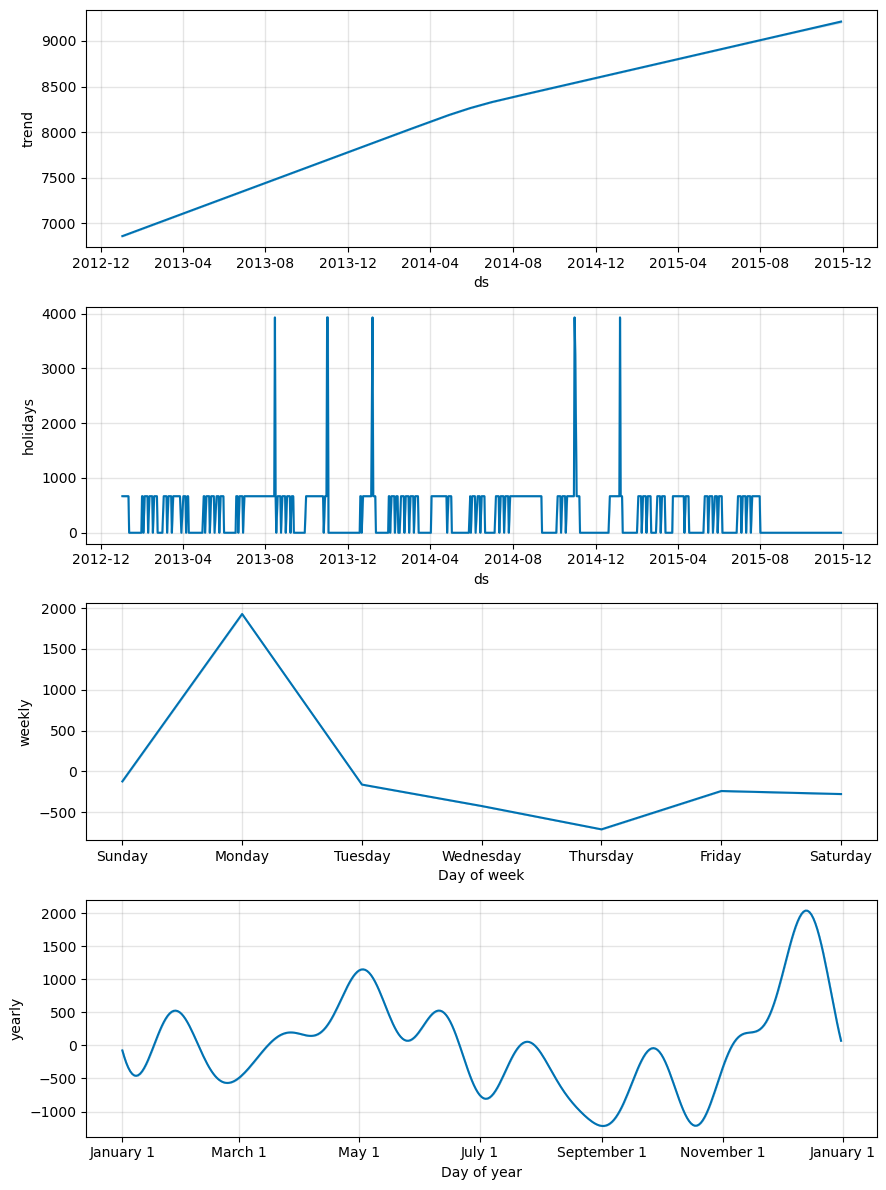

In [37]:
# Plotting the result

ax = model.plot(predictions, xlabel = 'Date', ylabel = 'Sales')
ax2 = model.plot_components(predictions)